In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('credit.csv')

df

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,good,furniture/appliances,1736,< 100 DM,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 DM,30,good,car,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 DM,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 DM,45,good,furniture/appliances,1845,< 100 DM,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes


In [4]:
df['default'].value_counts(normalize=True) * 100

default
no     70.0
yes    30.0
Name: proportion, dtype: float64

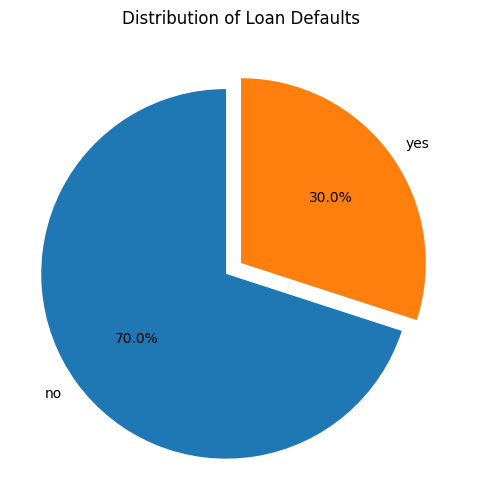

In [61]:
default_distribution = df['default'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 6))
default_distribution.plot.pie(
    autopct='%1.1f%%', 
    startangle=90,
    labels=default_distribution.index,
    explode=(0.1, 0)
)

plt.title('Distribution of Loan Defaults')
plt.ylabel('')
plt.show()

## Problem

Perusahaan kita memiliki jumlah fraud kredit sebanyak 30%

## Goals

Mengurangi tingkat fraud kredit secara signifikan untuk melindungi aset perusahaan

## Objective

Mengurangi tingkat fraud kredit dari 30% menjadi 15% dalam waktu 6bulan

In [6]:
df_yes = df.query('default == "yes"')
df_no = df.query('default == "no"')

In [7]:
def plot_kde(df_yes, df_no, columns):
    plt.figure(figsize=(12,7))

    sns.kdeplot(df_no[columns],label='No')
    sns.kdeplot(df_yes[columns],label='Yes')

    plt.title(f'Density Of {columns}')
    plt.legend()
    plt.show()

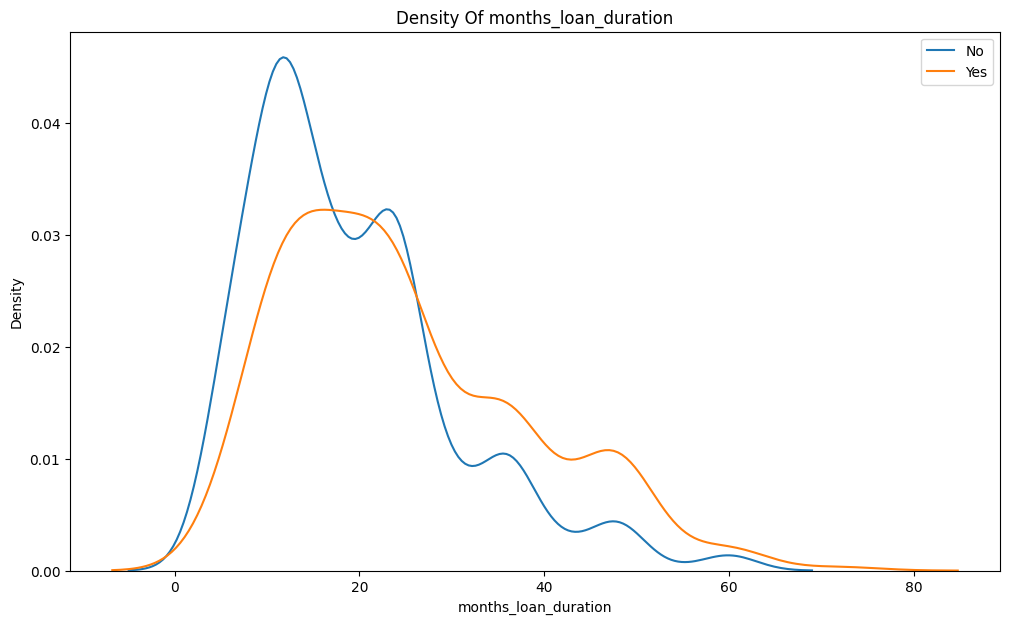

In [8]:
plot_kde(df_yes, df_no, 'months_loan_duration')

Durasi peminjaman paling tinggi yang sering mengalami fraud adalah durasi peminjaman yang pendek yaitu antara 10 - 25 bulan semakin lama masa peminjaman maka potensi untuk tidak fraud

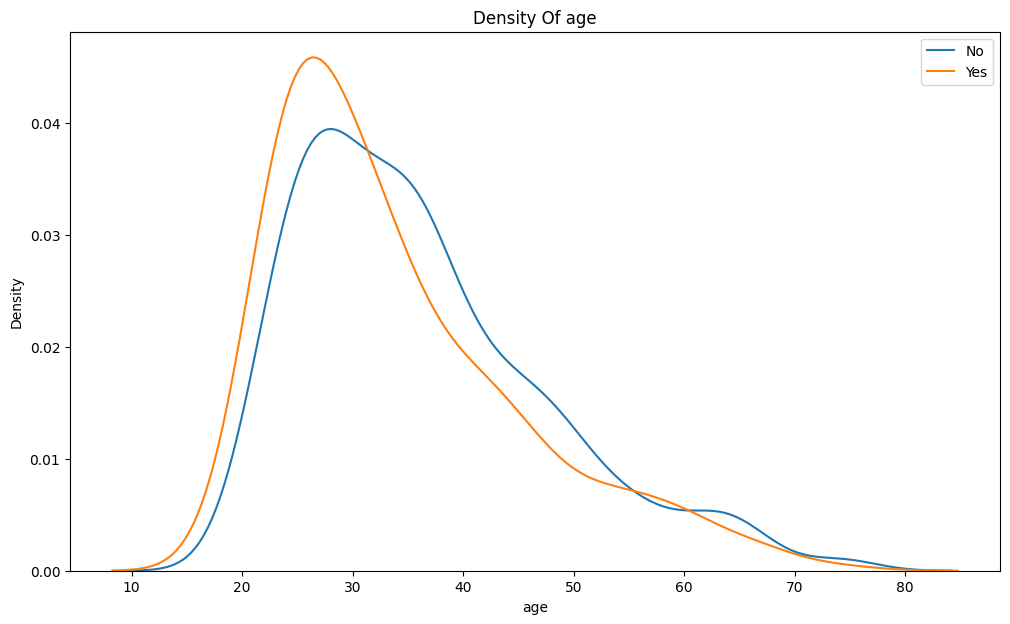

In [9]:
plot_kde(df_yes, df_no, 'age')

Umur yang sering melakukan fraud kredit ada di range 20 - 30 tahun

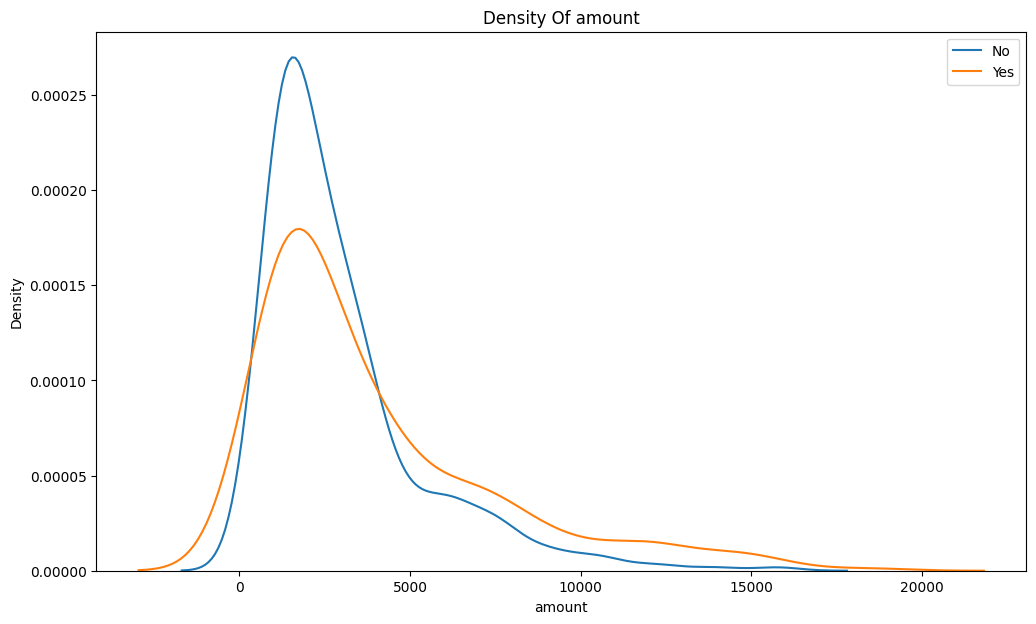

In [10]:
plot_kde(df_yes, df_no, 'amount')

User yang fraud adalah yang meminjam dengan angka range 1000 - 2000

In [41]:
def percentage_default(df, y, x):
    new_df = df.groupby([y,x], as_index=False).size()
    new_df['percentage'] = new_df['size'] / new_df.groupby(y)['size'].transform('sum') * 100
    
    return new_df

In [42]:
df_credit_history = percentage_default(df,'credit_history', 'default')

df_credit_history

,credit_history,default,size,percentage
0,critical,no,243,82.935154
1,critical,yes,50,17.064846
2,good,no,361,68.113208
3,good,yes,169,31.886792
4,perfect,no,15,37.500000
5,perfect,yes,25,62.500000
6,poor,no,60,68.181818
7,poor,yes,28,31.818182
8,very good,no,21,42.857143
9,very good,yes,28,57.142857


In [45]:
def create_bar_chart(data, x_col, y_col, hue_col, title, x_label, y_label):
    plt.figure(figsize=(18, 11))
    bars = sns.barplot(
        data=data,
        x=x_col,
        y=y_col,
        hue=hue_col,
    )

    for p in bars.patches:
        bars.annotate(
            format(p.get_height(), '.2f'),
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='center',
            xytext=(0, 9),
            textcoords='offset points'
        )

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(title=hue_col)
    plt.show()

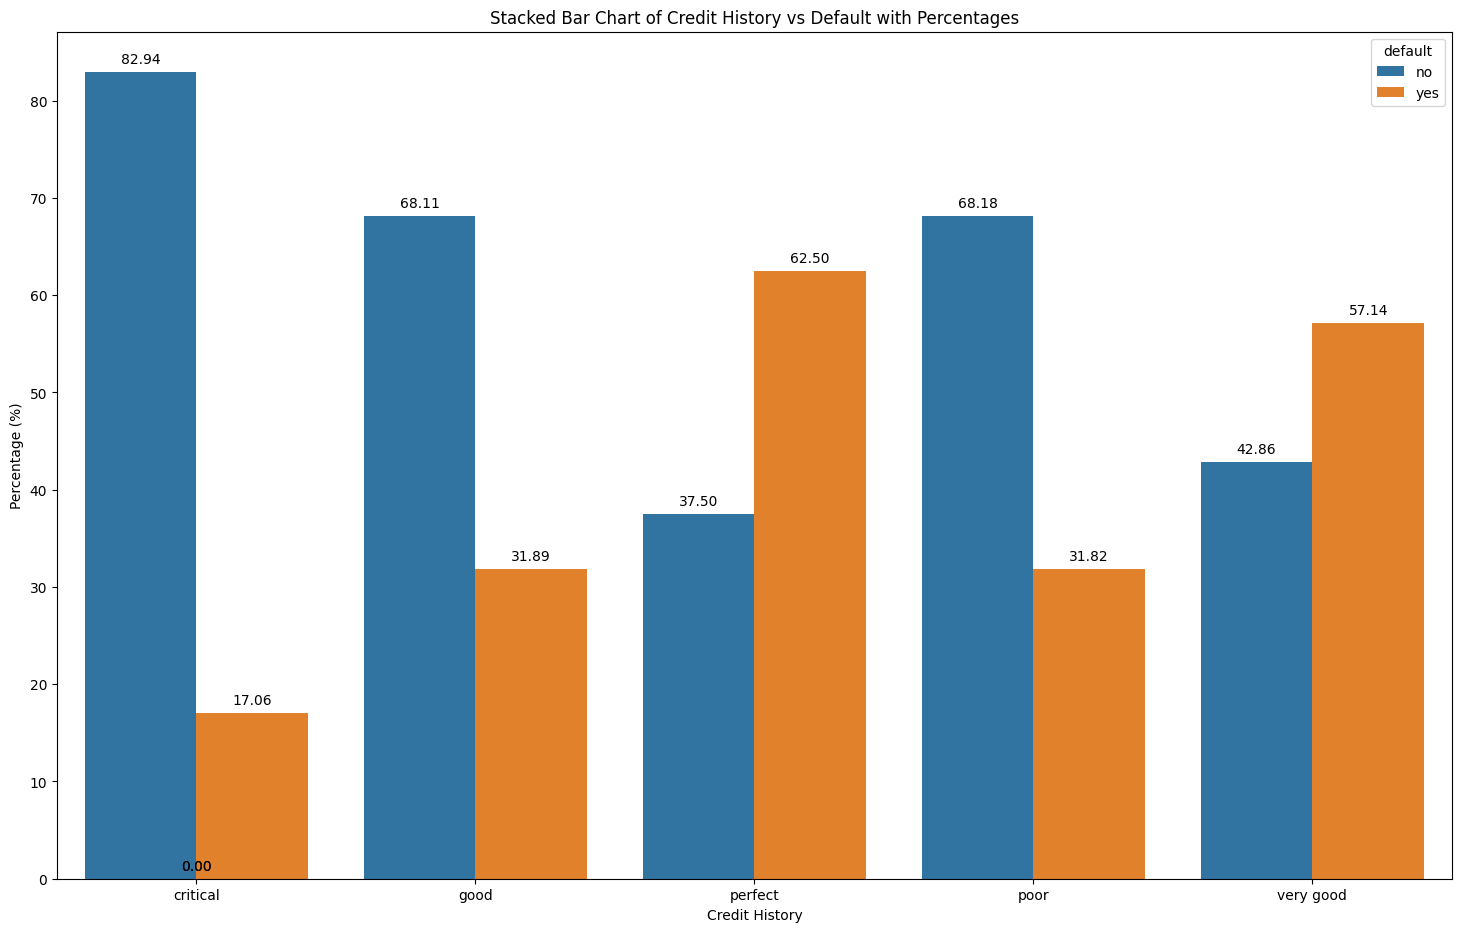

In [46]:
create_bar_chart(
    data=df_credit_history,
    x_col='credit_history',
    y_col='percentage',
    hue_col='default',
    title='Stacked Bar Chart of Credit History vs Default with Percentages',
    x_label='Credit History',
    y_label='Percentage (%)'
)


credit history yang paling banyak melakukan fraud adalah category perfect dan very good

In [50]:
df_job_default = percentage_default(df,'job', 'default')

df_job_default

,job,default,size,percentage
0,management,no,97,65.540541
1,management,yes,51,34.459459
2,skilled,no,444,70.476190
3,skilled,yes,186,29.523810
4,unemployed,no,15,68.181818
5,unemployed,yes,7,31.818182
6,unskilled,no,144,72.000000
7,unskilled,yes,56,28.000000


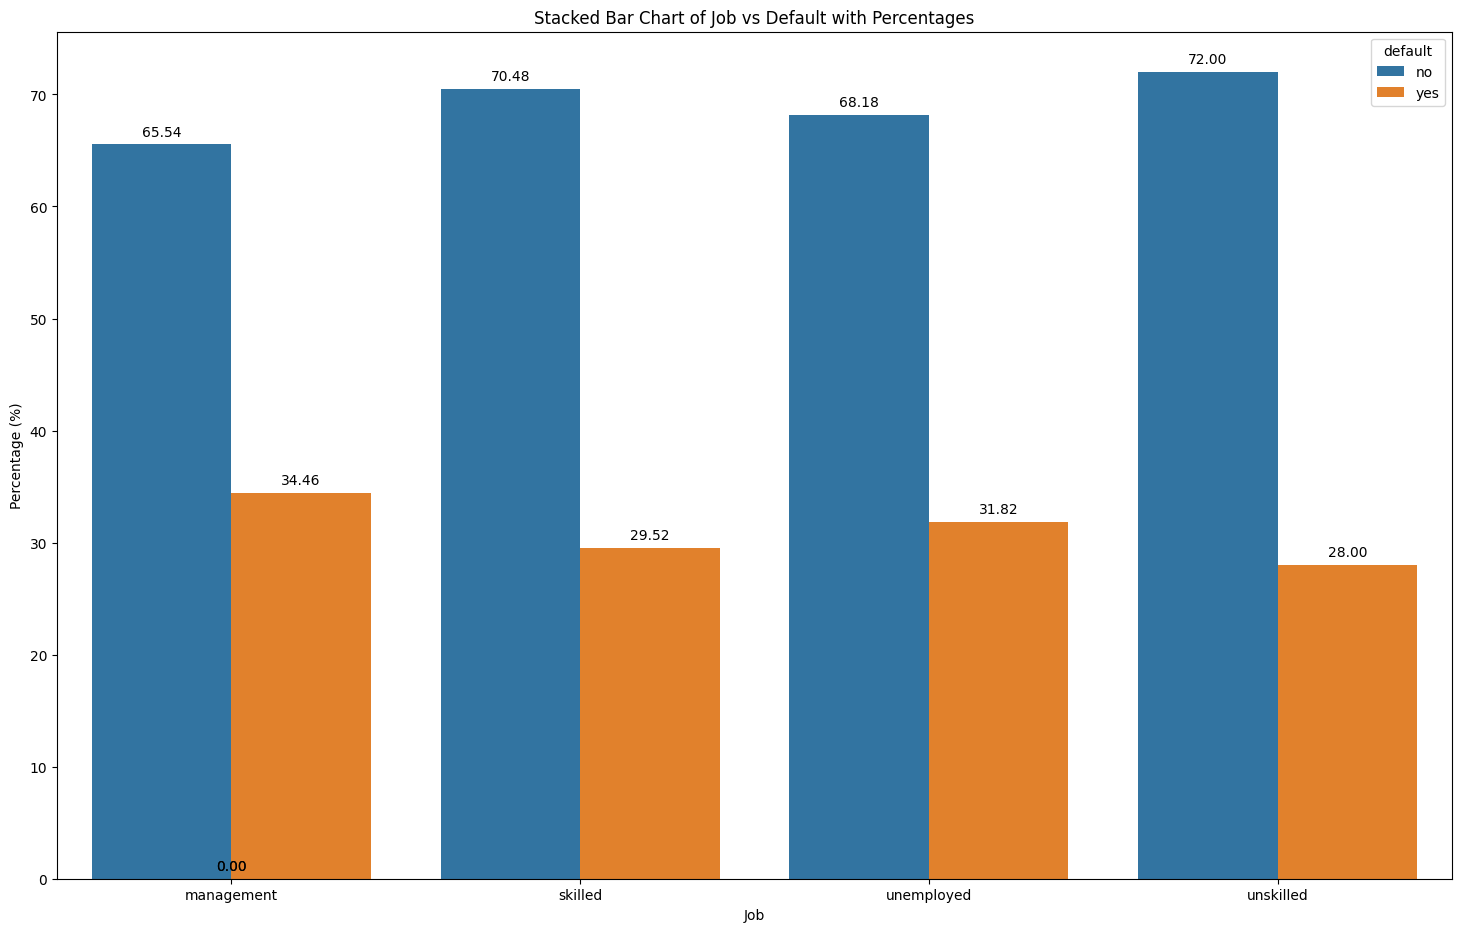

In [62]:
create_bar_chart(
    data=df_job_default,
    x_col='job',
    y_col='percentage',
    hue_col='default',
    title='Stacked Bar Chart of Job vs Default with Percentages',
    x_label='Job',
    y_label='Percentage (%)'
)


Untuk kemungkinan fraud berdasarkan pekerjaan tidak terlalu terlihat signifikan

In [54]:
df_housing_default = percentage_default(df,'housing', 'default')

df_housing_default

,housing,default,size,percentage
0,other,no,64,59.259259
1,other,yes,44,40.740741
2,own,no,527,73.913043
3,own,yes,186,26.086957
4,rent,no,109,60.893855
5,rent,yes,70,39.106145


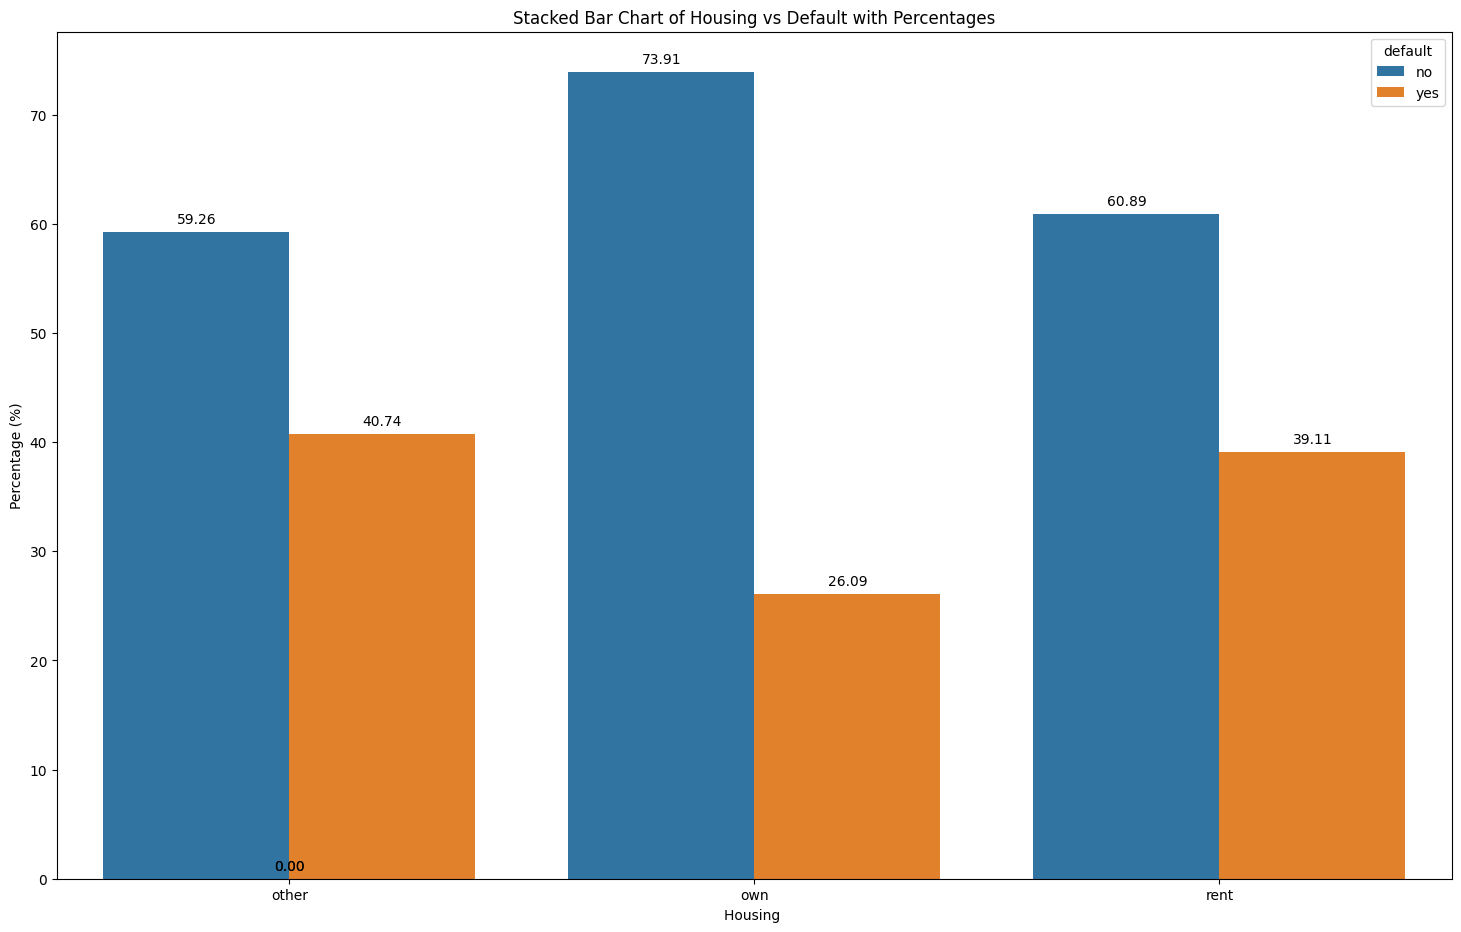

In [66]:
create_bar_chart(
    data=df_housing_default,
    x_col='housing',
    y_col='percentage',
    hue_col='default',
    title='Stacked Bar Chart of Housing vs Default with Percentages',
    x_label='Housing ',
    y_label='Percentage (%)'
)


Untuk kemungkinan fraud berdasarkan kategori housing tidak terlalu terlihat signifikan

In [59]:
df_dependents_default = percentage_default(df,'dependents', 'default')

df_dependents_default

,dependents,default,size,percentage
0,1,no,591,69.940828
1,1,yes,254,30.059172
2,2,no,109,70.322581
3,2,yes,46,29.677419


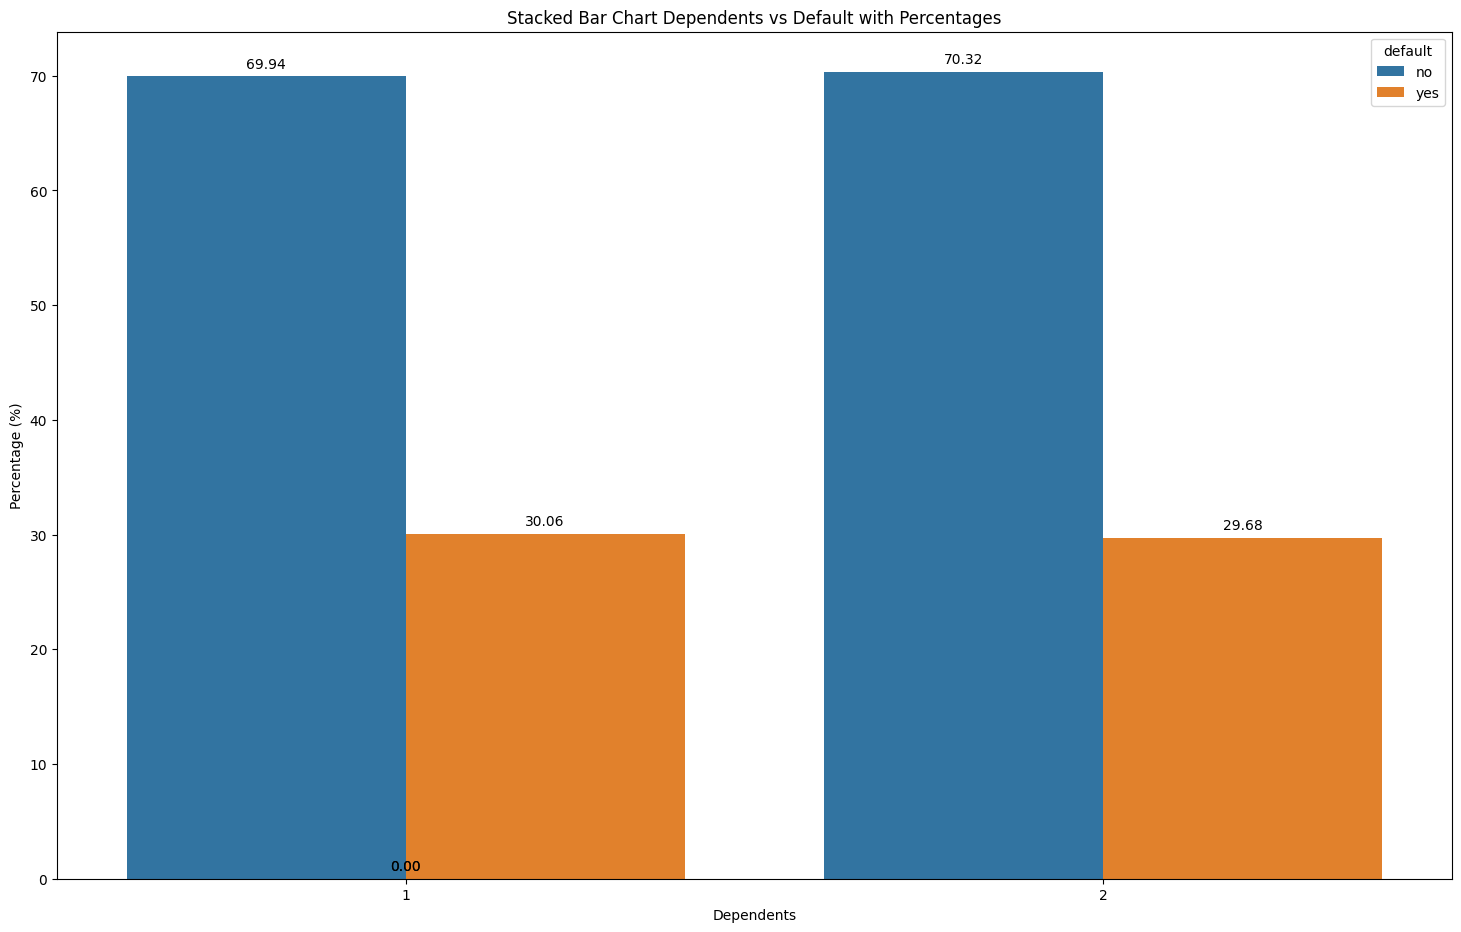

In [64]:
create_bar_chart(
    data=df_dependents_default,
    x_col='dependents',
    y_col='percentage',
    hue_col='default',
    title='Stacked Bar Chart Dependents vs Default with Percentages',
    x_label='Dependents',
    y_label='Percentage (%)'
)


Untuk kemungkinan fraud berdasarkan kategori dependents tidak terlalu terlihat signifikan

## Solusi
- Tambahkan langkah verifikasi tambahan, seperti dokumen pendukung atau wawancara langsung untuk pengajuan pinjaman dengan durasi pendek
- Pinjaman berdurasi pendek diberi bobot risiko lebih tinggi pada sistem fraud detection.
- Berikan bunga lebih rendah untuk pinjaman berdurasi lebih panjang guna mendorong peminjam memilih opsi ini.
- Kampanye edukasi terkait keamanan data dan pentingnya menjaga reputasi kredit melalui media sosial atau aplikasi
- Tambahkan skor risiko lebih tinggi untuk aplikasi dari kelompok usia 20 - 30, terutama jika digabung dengan faktor risiko lain (misalnya durasi pendek).
- Untuk kategori histori kredit Perfect dan Very Good, tambahkan langkah verifikasi seperti pengecekan dokumen pendukung untuk memastikan keabsahan data.
- Terapkan sistem penilaian kredit yang memperhitungkan faktor risiko terkini, bukan hanya histori kredit masa lalu.